# Assignment 3

In this assignment you will explore measures of centrality on two networks, a friendship network in Part 1, and a blog network in Part 2.

## Part 1

Answer questions 1-4 using the network `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

*The network has been loaded as networkx graph object `G1`.*

In [1]:
import networkx as nx

G1 = nx.read_gml('assets/friendships.gml')

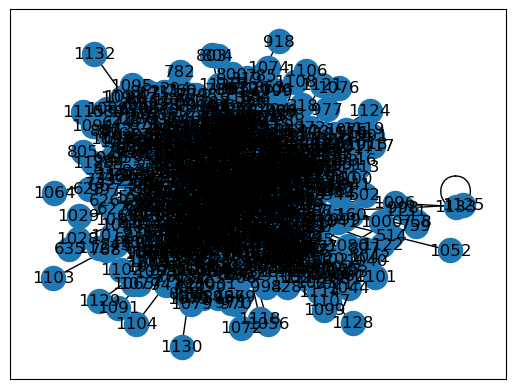

In [6]:
# nx.draw_networkx(G1)

### Question 1

Find the degree centrality, closeness centrality, and betweeness centrality of node 100.

*This function should return a tuple of floats `(degree_centrality, closeness_centrality, betweenness_centrality)`.*

In [4]:
def answer_one():
    # YOUR CODE HERE
    degCent = nx.degree_centrality(G1)[100]
    closeCent = nx.closeness_centrality(G1)[100]
    btwenCent = nx.betweenness_centrality(G1, 
                                          normalized = True, 
                                          endpoints = False)[100]

    
    return (degCent, closeCent, btwenCent)

In [5]:
ans_one = answer_one()
assert type(ans_one) == tuple, "You must return a tuple"


### Use centrality measures to answer questions 2-4

### Question 2

Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid. Apply your knowledge in network centrality to select the best candidate for the voucher. 

*This function should return an integer, the chosen node.*

In [10]:
# degCent = nx.degree_centrality(G1)
# max(degCent, key=degCent.get)

105

In [11]:
def answer_two():
    # YOUR CODE HERE
    # as many connections as it can
    degCent = nx.degree_centrality(G1)
    
    # return the key for the max value
    return max(degCent, key=degCent.get)

In [12]:
ans_two = answer_two()


### Question 3

Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches nodes as quickly as possible (i.e. in the fewest number of hops). How will you change your selection strategy? Write a function to tell us who is the best candidate in the network under this condition.

*This function should return an integer, the chosen node.*

In [19]:
def answer_three():
    # YOUR CODE HERE
    # important nodes are close to other nodes
    closeCent = nx.closeness_centrality(G1)
    return max(closeCent, key=closeCent.get)

In [20]:
ans_three = answer_three()


### Question 4

Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. You competitor plans to remove people who act as bridges in the network. Identify the best possible person to be removed by your competitor?

*This function should return an integer, the chosen node.*

In [23]:
def answer_four():
    # YOUR CODE HERE
    btwenCent = nx.betweenness_centrality(G1, 
                                          normalized = True, 
                                          endpoints = False)
    return max(btwenCent, key=btwenCent.get)

In [24]:
ans_four = answer_four()


## Part 2

`G2` is a directed network of political blogs, where nodes correspond to a blog and edges correspond to links between blogs. Use your knowledge of PageRank and HITS to answer Questions 5-9.

In [25]:
G2 = nx.read_gml('assets/blogs.gml')

### Question 5

Apply the Scaled Page Rank Algorithm to this network. Find the Page Rank of node 'realclearpolitics.com' with damping value 0.85.

*This function should return a float.*

In [26]:
def answer_five():
    # YOUR CODE HERE
    rank = nx.pagerank(G2,alpha=0.85)
    return rank['realclearpolitics.com']

In [27]:
ans_five = answer_five()


### Question 6

Apply the Scaled Page Rank Algorithm to this network with damping value 0.85. Find the 5 nodes with highest Page Rank. 

*This function should return a list of the top 5 blogs in desending order of Page Rank.*

In [32]:
# import operator

# rank = nx.pagerank(G2,alpha=0.85)
# rank_ls = sorted(rank.items(), 
#        key = operator.itemgetter(1), 
#        reverse = True)[0:5]
# rank_key = [key for key, _ in rank_ls]
# rank_key

['dailykos.com',
 'atrios.blogspot.com',
 'instapundit.com',
 'blogsforbush.com',
 'talkingpointsmemo.com']

In [35]:
import operator

def answer_six():
    # YOUR CODE HERE
    rank = nx.pagerank(G2,alpha=0.85)
    rank_ls = sorted(rank.items(), 
           key = operator.itemgetter(1), 
           reverse = True)[0:5]
    rank_key = [key for key, _ in rank_ls]
    return rank_key

In [36]:
ans_six = answer_six()
assert type(ans_six) == list, "You must return a list"


### Question 7

Apply the HITS Algorithm to the network to find the hub and authority scores of node 'realclearpolitics.com'. 

*Your result should return a tuple of floats `(hub_score, authority_score)`.*

In [39]:
hits = nx.hits(G2)

In [40]:
def answer_seven():
    # YOUR CODE HERE
    
    hits = nx.hits(G2)
    return hits[0]['realclearpolitics.com'], hits[1]['realclearpolitics.com']

In [41]:
ans_seven = answer_seven()
assert type(ans_seven) == tuple, "You must return a tuple"


### Question 8 

Apply the HITS Algorithm to this network to find the 5 nodes with highest hub scores.

*This function should return a list of the top 5 blogs in desending order of hub scores.*

In [45]:
def answer_eight():
    # YOUR CODE HERE
    hits_hub = nx.hits(G2)[0]
    rank_ls = sorted(hits_hub.items(), 
           key = operator.itemgetter(1), 
           reverse = True)[0:5]
    return [blog for blog, _ in rank_ls]

In [46]:
ans_eight = answer_eight()
assert type(ans_eight) == list, "You must return a list"


In [47]:
# ans_eight

['politicalstrategy.org',
 'madkane.com/notable.html',
 'liberaloasis.com',
 'stagefour.typepad.com/commonprejudice',
 'bodyandsoul.typepad.com']

### Question 9 

Apply the HITS Algorithm to this network to find the 5 nodes with highest authority scores.

*This function should return a list of the top 5 blogs in desending order of authority scores.*

In [48]:
def answer_nine():
    # YOUR CODE HERE
    hits_aut = nx.hits(G2)[1]
    rank_ls = sorted(hits_aut.items(), 
           key = operator.itemgetter(1), 
           reverse = True)[0:5]
    return [blog for blog, _ in rank_ls]

In [49]:
ans_nine = answer_nine()
assert type(ans_nine) == list, "You must return a list"
